In [1]:
import math
import numpy
from matplotlib import pyplot
%matplotlib inline

In [2]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [17]:
# Set parameters.
g = 9.81  # gravitational acceleration (m.s^{-2})
vt = 4.9  # trim velocity (m.s)
CD = 1.0 / 5.0  # drag coefficient
CL = 1.0  # lift coefficient

# Set initial conditions.
v0 = 6.5  # start at the trim velocity
theta0 = -0.1 # trajectory angle
x0 = 0.0  # horizontal position
y0 = 2.0  # vertical position (altitude)

In [4]:
def rhs_phugoid(u, CL, CD, g, vt):
    """
    Returns the right-hand side of the phugoid system of equations.
    
    Parameters
    ----------
    u : list or numpy.ndarray
        Solution at the previous time step
        as a list or 1D array of four floats.
    CL : float
        Lift coefficient.
    CD : float
        Drag coefficient.
    g : float
        Gravitational acceleration.
    vt : float
        Trim velocity.
    
    Returns
    -------
    rhs : numpy.ndarray
        The right-hand side of the system
        as a 1D array of four floats.
    """
    v, theta, x, y = u
    rhs = numpy.array([-g * math.sin(theta) - CD / CL * g / vt**2 * v**2,
                       -g * math.cos(theta) / v + g / vt**2 * v,
                       v * math.cos(theta),
                       v * math.sin(theta)])
    return rhs


In [5]:
def rk2_step(u, f, dt, *args):
    """
    Returns the solution at the next time step using 2nd-order
    Runge-Kutta method.
    
    Parameters
    ----------
    u : numpy.ndarray
        Solution at the previous time step
        as a 1D array of floats.
    f : function
        Function to compute the right-hand side of the system.
    dt : float
        Time-step size.
    args : tuple, optional
        Positional arguments to pass to the function f.
    
    Returns
    -------
    u_new : numpy.ndarray
        The solution at the next time step
        as a 1D array of floats.
    """
    u_star = u + 0.5 * dt * f(u, *args)
    u_new = u + dt * f(u_star, *args)
    return u_new


In [6]:
def rk2_output(T, dt):
    
    N = int(T/dt) + 1
    
# Create array to store solution at each time step
    u_rk2 = numpy.empty((N,4))

# Set initial conditions
    u_rk2[0] = numpy.array([v0, theta0, x0, y0])

# Time integration with rk2 method

    for n in range(N-1):
        u_rk2[n+1] = rk2_step(u_rk2[n], rhs_phugoid, dt, CL, CD, g, vt)
    
    return u_rk2

In [15]:
def plot(T, dt):
    
    idx_negative_rk2 = numpy.where(rk2_output(T, dt)[:,3] < 0.0)[0]
    
    if len(idx_negative_rk2) == 0:
        idx_ground_rk2 = N-1
        print('rk2, not landed yet')
    else: 
        idx_ground_rk2 = idx_negative_rk2[0]
        
    x_rk2 = rk2_output(T, dt)[:,2]
    y_rk2 = rk2_output(T, dt)[:,3]
    
    
    #Plot the glider's path for rk2 method.
    pyplot.figure(figsize=(9.0, 6.0))
    pyplot.subplot(121)
    pyplot.grid()
    pyplot.xlabel('x')
    pyplot.ylabel('y') 
    pyplot.plot(x_rk2[:idx_ground_rk2], y_rk2[:idx_ground_rk2], label='RK2') 
    print('Distance traveled, rk2, dt_value', dt,':',' {:.3f}'.format(x_rk2[idx_ground_rk2 - 1]))
    print('Time taken, rk2, dt_value', dt,':', '{:.3f}'.format(dt*(idx_ground_rk2 -1)))

Distance traveled, rk2, dt_value 0.001 :  14.530
Time taken, rk2, dt_value 0.001 : 3.073


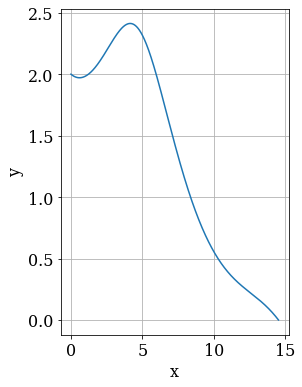

In [18]:
plot(23.0, 0.001)